In [6]:
import pandas as pd

#File location
file_path = 'C:\\Users\\prave\\OneDrive\\Desktop\\College\\Course 8 - Capstone_Business Intelligence and Data Analytics\\Data_set\\Medicaid_Managed_Care_Q4_2024.csv'

#Check File path
import os
print(os.path.exists(file_path))

# Read the CSV into a pandas DataFrame
df = pd.read_csv(file_path, encoding='latin1')
columns = [
    'State',
    'County',
    'MCO Name',
    'Service Category',
    'Number of Active Patients',
    'Number of Eligible MCO Patients',
    'Number of Providers',
    'Percent Of Eligible Patients Receiving Services',
    'Number of Services per Active Patient',
    'Number of Active Patients per Provider',
    'Calendar Year',
    'Plan Category'
]

# Preview the first few rows
df.head()

True


,ï»¿State,County,MCO Name,Service Category,Number of Active Patients,Number of Eligible MCO Patients,Number of Providers,Percent Of Eligible Patients Receiving Services,Number of Services per Active Patient,Number of Active Patients per Provider,Calendar Year,Plan Category
0,Arizona,Apache,United Healthcare,Behavioral Health,*,*,11,10.47%,7.0,*,2020,Comprehensive MCO
1,Arizona,Apache,Mercy Care,Behavioral Health,*,*,8,30.56%,9.0,*,2020,Comprehensive MCO
2,Arizona,Apache,Banner University Family Care,Behavioral Health,*,*,7,5.88%,1.0,*,2020,Comprehensive MCO
3,Arizona,Apache,Ltc Dd Des,Behavioral Health,67,107,17,62.62%,371.0,4:01,2020,Comprehensive MCO
4,Arizona,Apache,Az Complete Health,Behavioral Health,*,*,10,15.79%,10.0,*,2020,Comprehensive MCO


In [8]:
# Research Question 1 : 
# How does the number of providers affect the percentage of eligible patients receiving services across different counties and states?
import matplotlib.pyplot as plt

# Create a new column combining State and County for clearer labels
df['State_County'] = df['ï»¿State'] + ' - ' + df['County']

# Make sure the data is numeric
df['Number of Active Patients per Provider'] = pd.to_numeric(
    df['Number of Active Patients per Provider'], errors='coerce'
)

# Drop rows with missing or invalid data
df_clean = df.dropna(subset=['Number of Active Patients per Provider'])

# sort by value for better visualization
df_sorted = df_clean.sort_values(by='Number of Active Patients per Provider', ascending=False)

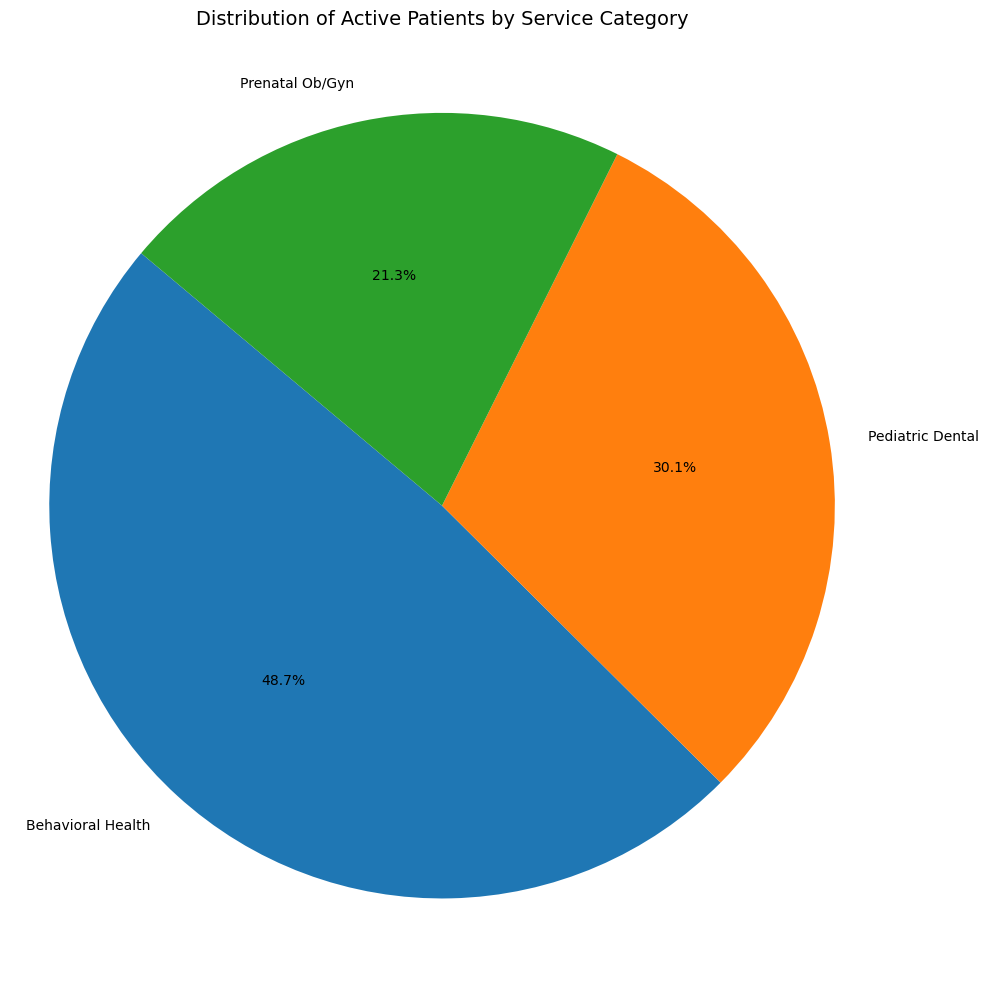

In [22]:
# Research Question- 2: 
# Which MCOs or plan categories deliver the highest number of services per active patient, and what does this suggest about care intensity or efficiency?

# convert to integer
df['Number of Active Patients'] = pd.to_numeric(
    df['Number of Active Patients'], errors='coerce'
)

# compute service level summary
service_summary = df.groupby('Service Category')['Number of Active Patients'].sum()

#Plot the pie chart based on the distribution of Active Patients by Service Category
plt.figure(figsize=(10, 10))

plt.pie(
    service_summary.values,
    labels=service_summary.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title('Distribution of Active Patients by Service Category', fontsize=14)
plt.axis('equal') 

plt.tight_layout()
plt.show()

            Number of Active Patients  Number of Services per Active Patient
ï»¿State                                                                    
Michigan                     897831.0                               161105.0
New Mexico                   317029.0                                30484.0
Arizona                      180819.0                                52261.0
Nevada                        11438.0                                 2124.0
<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Michigan to Nevada
Data columns (total 2 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Number of Active Patients              4 non-null      float64
 1   Number of Services per Active Patient  4 non-null      float64
dtypes: float64(2)
memory usage: 96.0+ bytes
None
  ï»¿State  Number of Active Patients  Number of Services per Active Patient
0  Arizona                      

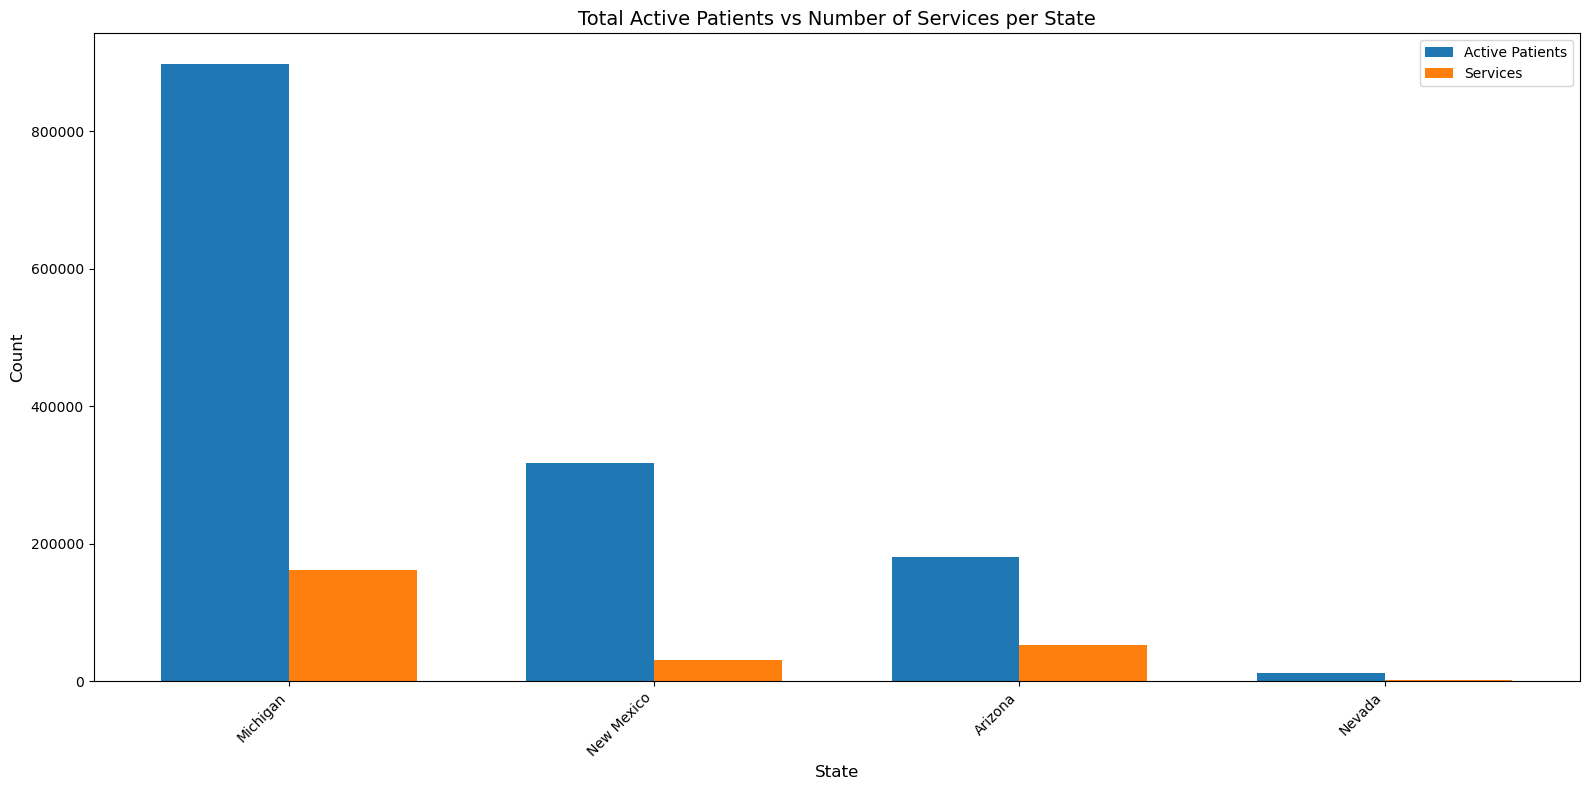

In [38]:
# Research Question- 3:
# What are the trends in the number of active patients and the number of services per active patient across states?

import numpy as np
# Conversion to int
df['Number of Active Patients'] = pd.to_numeric(
    df['Number of Active Patients'], errors='coerce'
)
df['Number of Services per Active Patient'] = pd.to_numeric(
    df['Number of Services per Active Patient'], errors='coerce'
)

# Group by State and sum both columns:
state_summary = df.groupby('ï»¿State').agg({
    'Number of Active Patients': 'sum',
    'Number of Services per Active Patient': 'sum'
}).sort_values(by='Number of Active Patients', ascending=False)


print(state_summary.head())
print(state_summary.info())

print(df[['ï»¿State', 'Number of Active Patients', 'Number of Services per Active Patient']].head())



plt.figure(figsize=(16, 8))

# Recalculate x positions
x = np.arange(len(state_summary))

# Bar width
width = 0.35

# Plot bars
bars1 = plt.bar(x - width/2, state_summary['Number of Active Patients'], width, label='Active Patients')
bars2 = plt.bar(x + width/2, state_summary['Number of Services per Active Patient'], width, label='Services')

# Add labels and title
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Total Active Patients vs Number of Services per State', fontsize=14)
plt.xticks(x, state_summary.index, rotation=45, ha='right')

plt.legend()
plt.tight_layout()
plt.show()